In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw_dataset.csv')

# Initial inspection
print(df.head())
print(df.info())
print(df.describe(include='all'))

               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342   

In [6]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example)
df['Gender Diversity (%)'] = df['Gender Diversity (%)'].fillna(df['Gender Diversity (%)'].median())

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Standardize categorical variables
df['AI Impact Level'] = df['AI Impact Level'].str.title()
df['Job Status'] = df['Job Status'].str.title()

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64
Duplicate rows: 0


Missing Data (%):
 Series([], dtype: float64)


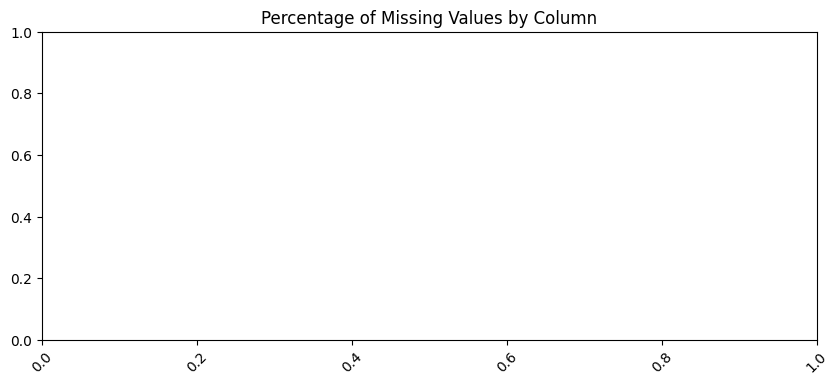

In [7]:
# Check missing values per column
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Data (%):\n", missing)

# Visualize missingness
plt.figure(figsize=(10, 4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Percentage of Missing Values by Column")
plt.show()

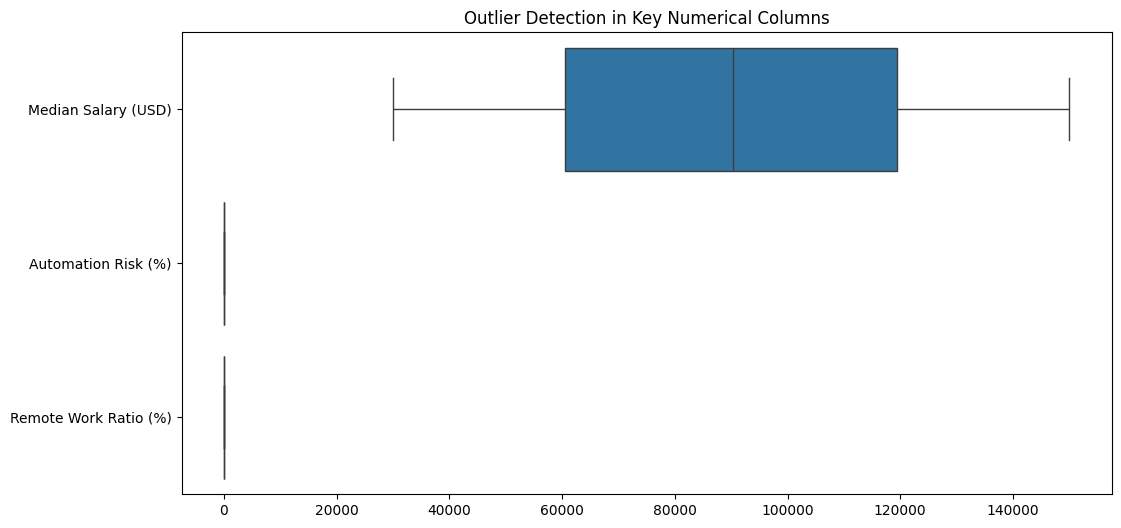

Found 0 salary outliers (e.g., CEOs, interns).


In [9]:
# Boxplot for numerical columns
num_cols = ['Median Salary (USD)', 'Automation Risk (%)', 'Remote Work Ratio (%)']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Outlier Detection in Key Numerical Columns")
plt.show()

# Use IQR to detect extreme outliers
Q1 = df['Median Salary (USD)'].quantile(0.25)
Q3 = df['Median Salary (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Median Salary (USD)'] < lower_bound) | (df['Median Salary (USD)'] > upper_bound)]
print(f"Found {len(outliers)} salary outliers (e.g., CEOs, interns).")

In [10]:
# Create a 'Future Growth' feature (Projected Openings vs Current)
df['Growth_Rate'] = (df['Projected Openings (2030)'] - df['Job Openings (2024)']) / df['Job Openings (2024)']

# Bin automation risk into categories
df['Risk_Category'] = pd.cut(df['Automation Risk (%)'], 
                             bins=[0, 30, 70, 100], 
                             labels=['Low', 'Medium', 'High'])

# Extract seniority from job titles (e.g., "Senior Data Analyst" → "Senior")
df['Seniority'] = df['Job Title'].apply(lambda x: 'Senior' if 'Senior' in x else 
                                       'Junior' if 'Junior' in x else 'Regular')

EDA in next file

In [14]:
df.to_csv('../data/cleaned_jobs_data.csv', index=False)

# Optional: Save as pickle for faster loading and preserving data types
df.to_pickle('../data/cleaned_jobs_data.pkl')

print("Cleaned data saved successfully!")

Cleaned data saved successfully!
